<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Ejer1-2_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importing linear regression function
import sklearn.linear_model as lm
# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
%matplotlib inline

### Lectura de datos


In [66]:
# Load data
df = pd.read_csv('https://drive.google.com/uc?id=1XiPaHHEQRZ5rGwtTalpfDRxpxRS7vgWW',names=['HorasEstudio','Aprueba'])
print(df)

   HorasEstudio  Aprueba
0             2        0
1             3        0
2             4        0
3             5        0
4             6        1
5             7        1
6             8        1
7             9        1
8            10        1


### Regresión Logística

### Cálculo de la   Función de Coste$J(\theta)$ y Gradiente

El objetivo de la regresión Logídtica es **minimizar la funncion de coste**

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

Donde el gradiente de $J(\theta)$ se define como

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

### Algoritmo Gradiente Descendente

Minimizar la función de Coste  $J(\theta)$ mediante la actualización de los parámetros $(\theta)$ hasta convergencia utilizando la siguiente ecuación   
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (actualizar de forma simultánea $\theta_j$ for all $j$)

##Formamos las matrices de características y el vector de clase

In [67]:
rows = df.shape[0]
cols = df.shape[1]
scores = df[['HorasEstudio']].values
results = df['Aprueba'].values
X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)
print(X.shape)
print(y.shape)


(9, 2)
(9, 1)


In [68]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [69]:
def hypotesis(x,theta):
    z = np.dot(x, theta)
    h = sigmoid(z)
    return h

In [70]:
def gradiente(x,y,theta,alfa,iteraciones,epsilon):
  import  math
  m=len(y)
  J_vals = []
  prev = math.inf
  for i in range(iteraciones):
      h = hypotesis(X, theta)
      cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
      J_vals.append(cost)
      if(abs( J_vals[i]- prev) < epsilon) :
             print("Convergencia Alcanzada !", i ," iteraciones")
             break
      prev = J_vals[i]
      gradient = np.dot(X.T, (h - y)) / m
      theta -= alpha * gradient
    #if i % 20000 == 0:
    #   print('iteracion ',i,'coste ', cost)
  print('Adjusted coefficient: {}'.format(theta))
  print("cost: {}".format(J_vals[i]))
  return theta, J_vals

In [71]:
theta = np.zeros((cols , 1))
print(theta)

[[0.]
 [0.]]


In [72]:
alpha=0.001
iteraciones = 10000000
epsilon = 1e-10
theta, costs = gradiente(X, y, theta, alpha, iteraciones,epsilon)

Adjusted coefficient: [[-32.28793351]
 [  5.88751796]]
cost: 0.011484871911195035


Plot $J(\theta)$

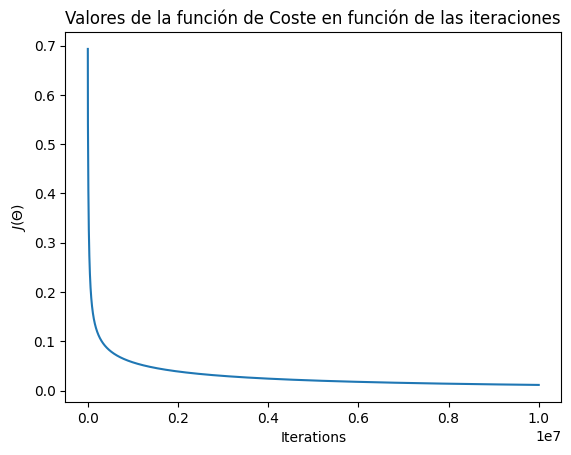

In [73]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\\Theta)$")
plt.title("Valores de la función de Coste en función de las iteraciones");

### Regresión Logistica, Sklearn



In [74]:
from sklearn.linear_model import LogisticRegression
# instantiate a logistic regression model, and fit with X and y
x1= df[['HorasEstudio']].values
y1  = df['Aprueba'].values

model = LogisticRegression(C=10)
model = model.fit(x1, y1)

# check the accuracy on the training set
model.score(x1, y1)
print("coef",model.coef_)
print("intercept\n",model.intercept_)

# predict_proba will return array containing proability of y = 0 and y = 1
print( "\n",model.predict_proba(x1)[:,1])
# predict will give convert the probability(y=1) values > .5 to 1 else 0
print (model.predict(x1))

coef [[2.67570118]]
intercept
 [-14.71626805]

 [8.56748381e-05 1.24277552e-03 1.77499475e-02 2.07878309e-01
 7.92150806e-01 9.82253135e-01 9.98757444e-01 9.99914340e-01
 9.99994101e-01]
[0 0 0 0 1 1 1 1 1]


In [75]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y1, model.predict(x1)))
print ("AUC :", roc_auc_score(y1, model.decision_function(x1)))

print ("Confusion matrix :\n",metrics.confusion_matrix(y1, model.predict(x1)))
print ("classification report :", metrics.classification_report(y1, model.predict(x1)))

Accuracy : 1.0
AUC : 1.0
Confusion matrix :
 [[4 0]
 [0 5]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



### Predicciones utilizando el vector $(\theta) $

$h_\theta(x) = x\theta$

In [76]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0


In [77]:
p = predict(theta, X)
print("Precición en entrenamiento:", sum(p==y)[0]/len(y)*100,"%")

Precición en entrenamiento: 100.0 %


In [78]:
test = np.array([20])
intercept_column = np.ones((test.shape[0], 1))
# Append the 'test' values as a new column to the intercept column.
test = np.append(intercept_column, test.reshape(-1, 1), axis=1)
print("Prepared test array for prediction:\n", test)
probability = sigmoid(test.dot(theta))
print("Una persona con 20 horas de estudio  tendrá una probabilidad  de aprobar de",
      np.round(probability))

Prepared test array for prediction:
 [[ 1. 20.]]
Una persona con 20 horas de estudio  tendrá una probabilidad  de aprobar de [[1.]]
